# PyTorch

## Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()
%load_ext tensorboard

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_moons

import torch

print(f"PyTorch version: {torch.__version__}")

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

scikit-learn version: 0.22.1
PyTorch version: 1.3.1


In [4]:
def plot_planar_data(X, y):
    """Plot some 2D data"""

    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5, label=1)
    plt.legend()

## Tensor API

### Tensor creation

In [5]:
# Create 1D tensor with predefined values
t = torch.tensor([5.5, 3])

print(t)
print(t.shape)

tensor([5.5000, 3.0000])
torch.Size([2])


In [6]:
# Create 2D tensor filled with random numbers from a uniform distribution
x = torch.rand(5, 3)

print(x)
print(x.shape)

tensor([[0.3746, 0.1669, 0.0174],
        [0.9889, 0.9538, 0.0463],
        [0.1561, 0.4398, 0.5971],
        [0.9370, 0.8256, 0.6580],
        [0.2451, 0.8639, 0.5963]])
torch.Size([5, 3])


### Operations

In [7]:
# Addition operator
y = x + 2

print(y)

tensor([[2.3746, 2.1669, 2.0174],
        [2.9889, 2.9538, 2.0463],
        [2.1561, 2.4398, 2.5971],
        [2.9370, 2.8256, 2.6580],
        [2.2451, 2.8639, 2.5963]])


In [8]:
# Addition method
y = torch.add(x, 2)

print(y)

tensor([[2.3746, 2.1669, 2.0174],
        [2.9889, 2.9538, 2.0463],
        [2.1561, 2.4398, 2.5971],
        [2.9370, 2.8256, 2.6580],
        [2.2451, 2.8639, 2.5963]])


In [9]:
y = torch.zeros(5, 3)

# In-place addition: tensor is mutated
y.add_(x)
y.add_(2)

print(y)

tensor([[2.3746, 2.1669, 2.0174],
        [2.9889, 2.9538, 2.0463],
        [2.1561, 2.4398, 2.5971],
        [2.9370, 2.8256, 2.6580],
        [2.2451, 2.8639, 2.5963]])


### Indexing

In [10]:
print(x)

# Print second column of tensor
print(x[:, 1])

tensor([[0.3746, 0.1669, 0.0174],
        [0.9889, 0.9538, 0.0463],
        [0.1561, 0.4398, 0.5971],
        [0.9370, 0.8256, 0.6580],
        [0.2451, 0.8639, 0.5963]])
tensor([0.1669, 0.9538, 0.4398, 0.8256, 0.8639])


### Reshaping with *view()*

PyTorch allows a tensor to be a *view* of an existing tensor. For memory efficiency reasons, view tensors share the same underlying data with their base tensor. 

In [11]:
# Reshape into a (15,) vector
x.view(15)

tensor([0.3746, 0.1669, 0.0174, 0.9889, 0.9538, 0.0463, 0.1561, 0.4398, 0.5971,
        0.9370, 0.8256, 0.6580, 0.2451, 0.8639, 0.5963])

In [12]:
# The dimension identified by -1 is inferred from other dimensions
print(x.view(-1, 5))  # Shape: (3,5)
print(x.view(5, -1))  # Shape: (5, 3)
print(x.view(-1,))  # Shape: (15,)

# Error: a tensor of size 15 can't be reshaped into a (?, 4) tensor
# print(x.view(-1, 4))

tensor([[0.3746, 0.1669, 0.0174, 0.9889, 0.9538],
        [0.0463, 0.1561, 0.4398, 0.5971, 0.9370],
        [0.8256, 0.6580, 0.2451, 0.8639, 0.5963]])
tensor([[0.3746, 0.1669, 0.0174],
        [0.9889, 0.9538, 0.0463],
        [0.1561, 0.4398, 0.5971],
        [0.9370, 0.8256, 0.6580],
        [0.2451, 0.8639, 0.5963]])
tensor([0.3746, 0.1669, 0.0174, 0.9889, 0.9538, 0.0463, 0.1561, 0.4398, 0.5971,
        0.9370, 0.8256, 0.6580, 0.2451, 0.8639, 0.5963])


### Reshaping Ã  la NumPy

In [13]:
# Reshape into a (3,5) tensor, creating a view if possible
x.reshape(3, 5)

tensor([[0.3746, 0.1669, 0.0174, 0.9889, 0.9538],
        [0.0463, 0.1561, 0.4398, 0.5971, 0.9370],
        [0.8256, 0.6580, 0.2451, 0.8639, 0.5963]])

### From NumPy to PyTorch

In [14]:
# Create a NumPy tensor
a = np.random.rand(2, 2)
# Convert it into a PyTorch tensor
b = torch.from_numpy(a)

print(b)

# a and b share memory
a *= 2
print(b)
b += 1
print(a)

tensor([[0.6285, 0.2705],
        [0.8091, 0.1353]], dtype=torch.float64)
tensor([[1.2571, 0.5411],
        [1.6182, 0.2706]], dtype=torch.float64)
[[2.25707965 1.54108591]
 [2.61824455 1.27061508]]


### From PyTorch to NumPy

In [15]:
# Create a PyTorch tensor
a = torch.rand(2,2)
# Convert it into a NumPy tensor
b = a.numpy()

print(b)

# a and b share memory
a *= 2
print(b)
b += 1
print(a)

[[0.05700839 0.8589342 ]
 [0.8565902  0.6768685 ]]
[[0.11401677 1.7178684 ]
 [1.7131804  1.353737  ]]
tensor([[1.1140, 2.7179],
        [2.7132, 2.3537]])


### GPU-based tensors

In [16]:
# Look for an available CUDA device
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Move an existing tensor to GPU
    x_gpu = x.to(device)
    print(x_gpu)
    # Directly create a tensor on GPU
    t_gpu = torch.ones(3, 3, device=device)
    print(t_gpu)
else:
    print("No CUDA device available :(")

No CUDA device available :(


In [17]:
# Try to copy tensor to GPU, fall back on CPU instead
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_device = x.to(device)

print(x_device)

tensor([[0.3746, 0.1669, 0.0174],
        [0.9889, 0.9538, 0.0463],
        [0.1561, 0.4398, 0.5971],
        [0.9370, 0.8256, 0.6580],
        [0.2451, 0.8639, 0.5963]])


## Neural networks API

### Building models with PyTorch

The `torch.nn` package provides the basic building blocks for assembling models. Other packages like `torch.optim` and `torchvision` define training utilities and specialized tools.

PyTorch offers a great deal of flexibility for creating custom architectures and training loops, hence its popularity among researchers.

### Example 1: training a dense network on planar data

x: (1000, 2). y: (1000,)


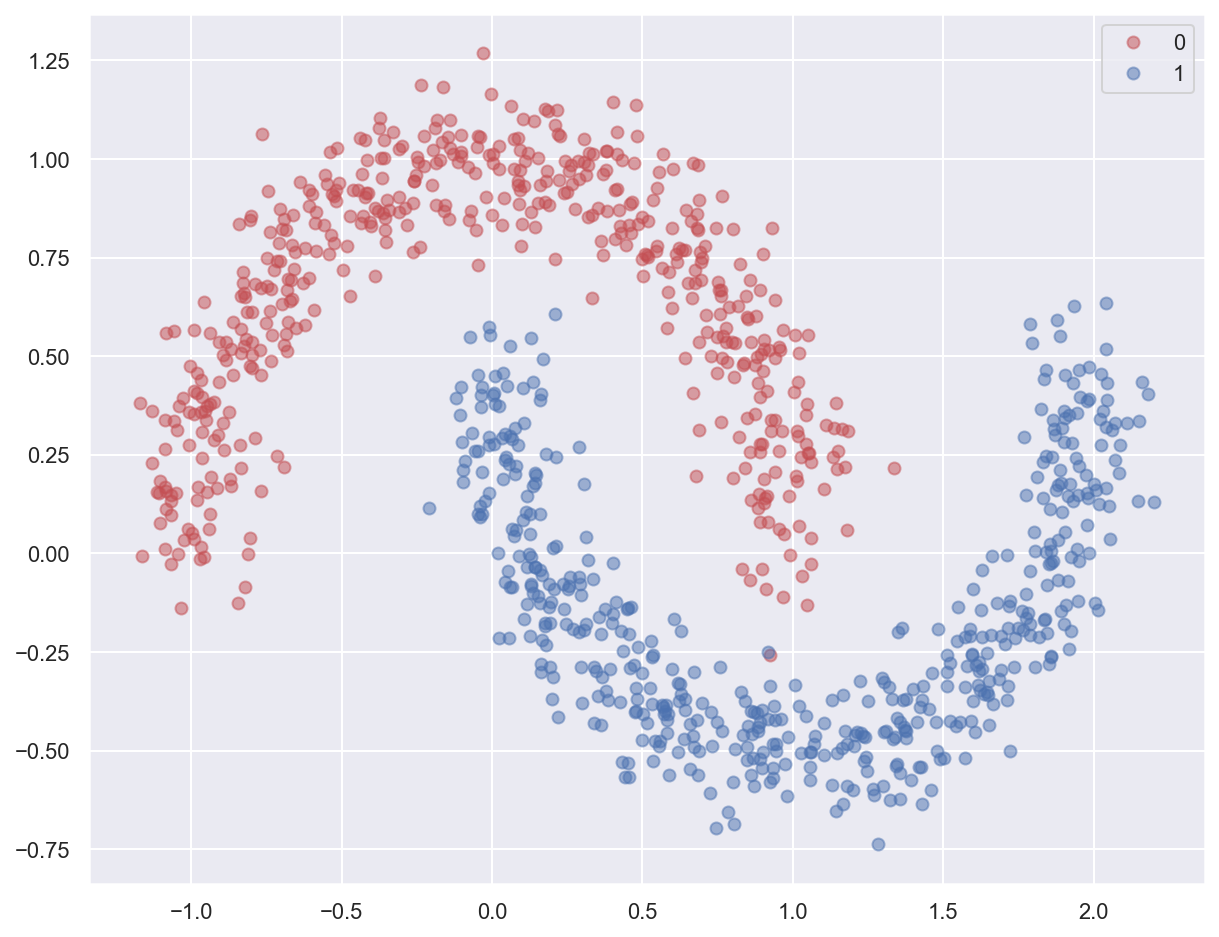

In [21]:
# Generate moon-shaped, non-linearly separable data
x, y = make_moons(n_samples=1000, noise=0.10, random_state=0)

print(f'x: {x.shape}. y: {y.shape}')
plot_planar_data(x, y)

In [22]:
# Create PyTorch tensors from Numpy data, with appropriate types
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).long()

#### Model definition

In [23]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
dense_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=3),
    nn.Tanh(),
    nn.Linear(in_features=3, out_features=2)
)

print(dense_model)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Tanh()
  (2): Linear(in_features=3, out_features=2, bias=True)
)


In [24]:
# The nn package also contains definitions of popular loss functions; in this
# case we will use Cross Entropy as our loss function.
loss_fn = nn.CrossEntropyLoss()

# Used to enable training analysis through TensorBoard
# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

#### Model training

In [25]:
learning_rate = 1.0
num_epochs = 2000

for epoch in range(num_epochs):
    # Forward pass: compute model prediction
    y_pred = dense_model(x_train)

    # Compute and print loss
    loss = loss_fn(y_pred, y_train)
    if epoch % 100 == 0:
        print(f"Epoch [{epoch+1:4}/{num_epochs}], loss: {loss:.6f}")
        # Write epoch loss for TensorBoard
        writer.add_scalar("Loss/train", loss.item(), epoch)

    # Zero the gradients before running the backward pass
    # Avoids accumulating gradients erroneously
    dense_model.zero_grad()

    # Backward pass: compute gradient of the loss w.r.t all the learnable parameters of the model
    loss.backward()

    # Update the weights using gradient descent
    # no_grad() avoids tracking operations history here
    with torch.no_grad():
        for param in dense_model.parameters():
            param -= learning_rate * param.grad


print(f"Training finished. Final loss: {loss:.6f}")

Epoch [   1/2000], loss: 0.615728
Epoch [ 101/2000], loss: 0.255993
Epoch [ 201/2000], loss: 0.254656
Epoch [ 301/2000], loss: 0.253930
Epoch [ 401/2000], loss: 0.253383
Epoch [ 501/2000], loss: 0.252850
Epoch [ 601/2000], loss: 0.252219
Epoch [ 701/2000], loss: 0.251364
Epoch [ 801/2000], loss: 0.250020
Epoch [ 901/2000], loss: 0.165510
Epoch [1001/2000], loss: 0.034935
Epoch [1101/2000], loss: 0.018792
Epoch [1201/2000], loss: 0.013152
Epoch [1301/2000], loss: 0.010341
Epoch [1401/2000], loss: 0.008661
Epoch [1501/2000], loss: 0.007542
Epoch [1601/2000], loss: 0.006741
Epoch [1701/2000], loss: 0.006137
Epoch [1801/2000], loss: 0.005665
Epoch [1901/2000], loss: 0.005284
Training finished. Final loss: 0.004974


### Example 2: training a convnet on CIFAR10

#### Data loading and preparation

In [27]:
# Transform images of range [0, 1] into tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load training set
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
# Get an iterable from training set
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2
)

Files already downloaded and verified
Files already downloaded and verified


#### Expected network architecture

[![Example CNN architecture](images/cnn_example.png)](https://github.com/gwding/draw_convnet)

In [28]:
# Define a CNN that takes (3, 32, 32) tensors as input (channel-first)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Convolution output is 16 5x5 feature maps, flattened as a 400 elements vectors
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [29]:
cnn_model = Net()
print(cnn_model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


#### Model training

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 2

# Loop over the dataset multiple times
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        # inputs is a 4D tensor of shape (batch size, channels, rows, cols)
        # labels is a 1D tensor of shape (batch size,)
        inputs, labels = data

        # Reset the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = cnn_model(inputs)

        # Loos computation
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # GD step
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(
                f"Epoch [{epoch+1}/{num_epochs}], batch {i+1:5}, loss: {running_loss / 2000:.6f}"
            )
            running_loss = 0.0


print(f"Training finished")

Epoch [1/2], batch  2000, loss: 2.108662
Epoch [1/2], batch  4000, loss: 1.737864
Epoch [1/2], batch  6000, loss: 1.592003
Epoch [1/2], batch  8000, loss: 1.507958
Epoch [1/2], batch 10000, loss: 1.445331
Epoch [1/2], batch 12000, loss: 1.393309
Epoch [2/2], batch  2000, loss: 1.327055
Epoch [2/2], batch  4000, loss: 1.302520
Epoch [2/2], batch  6000, loss: 1.286105
Epoch [2/2], batch  8000, loss: 1.265079
Epoch [2/2], batch 10000, loss: 1.240521
Epoch [2/2], batch 12000, loss: 1.270833
Training finished


#### Model evaluation

In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        # Load inputs and labels
        images, labels = data
        # Compute model predictions for batch. Shape is (batch size, number of classes) so(4, 10) here
        outputs = cnn_model(images)
        # Get the indexes of maximum values along the second axis
        # This gives us the predicted classes (those with the highest prediction value)
        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size(0)
        # Add the number of correct predictions for the batch to the total count
        correct += (predicted == labels).sum().item()

print(f"Test acccuracy: {(100 * correct / total)}%")

Test acccuracy: 56.16%


### Training analysis with TensorBoard

More info on PyTorch/TensorBoard integration [here](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html).

![PyTorch+Tensorboard](images/pytorch_tensorboard.png)